In [12]:
import pandas as pd  
import numpy as np  
import seaborn as sns 
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [8]:
data = pd.read_csv("bcwdata.csv", names = ["Sample code number","Clump Thickness","Uniformity of Cell Size","Uniformity of Cell Shape","Marginal Adhesion","Single Epithelial Cell Size","Bare Nuclei","Bland Chromatin","Normal Nucleoli","Mitoses","Class"]);

In [3]:
data.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [6]:
data.dtypes

Sample code number              int64
Clump Thickness                 int64
Uniformity of Cell Size         int64
Uniformity of Cell Shape        int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Bland Chromatin                 int64
Normal Nucleoli                 int64
Mitoses                         int64
Class                           int64
dtype: object

In [7]:
data.isnull().sum()

Sample code number             0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [4]:
data.shape

(699, 11)

In [9]:
# data = data.drop(['Bare Nuclei'], axis = 1)
data = data.drop(columns="Sample code number")
data.shape

(699, 10)

In [10]:
data.replace('?', -99999, inplace=True)

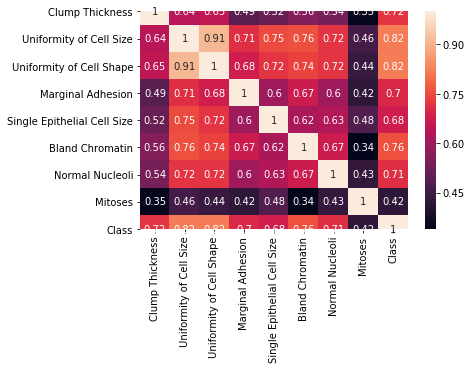

In [13]:
correlation_matrix = data.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

In [16]:
# x = data[data.columns[1:9]]
# y = data[data.columns[9]]
X = np.array(data.drop(['Class'], 1))
y = np.array(data['Class'])

In [17]:
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
y = labelencoder_Y.fit_transform(y)

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [22]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(524, 9)
(175, 9)
(524,)
(175,)


In [25]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(random_state = 0)
logmodel.fit(X_train, Y_train)

C:\Users\dellg7\AppData\Local\Programs\Python\Python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [36]:
#predictions
y_pred = logmodel.predict(X_test)
print(y_pred)

[0 0 1 0 1 0 1 0 1 1 0 0 1 1 1 0 0 1 1 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 1 0 0 1 1
 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 1
 1 1 0 0 0 0 0 1 0 1 1 0 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0
 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0]


In [37]:
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
print("Accuracy with threshold :",metrics.accuracy_score(Y_test, y_pred))

Accuracy with threshold : 0.9542857142857143


### With threshold 0.1

In [38]:
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, roc_auc_score, precision_score
THRESHOLD = 0.1
preds = np.where(logmodel.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)

pd.DataFrame(data=[accuracy_score(Y_test, preds), recall_score(Y_test, preds),
                   precision_score(Y_test, preds), roc_auc_score(Y_test, preds)], 
             index=["accuracy", "recall", "precision", "roc_auc_score"])

,0
accuracy,0.920000
recall,0.984127
precision,0.826667
roc_auc_score,0.934028


### With threshold 0.25

In [34]:
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, roc_auc_score, precision_score
THRESHOLD = 0.25
preds = np.where(logmodel.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)

pd.DataFrame(data=[accuracy_score(Y_test, preds), recall_score(Y_test, preds),
                   precision_score(Y_test, preds), roc_auc_score(Y_test, preds)], 
             index=["accuracy", "recall", "precision", "roc_auc_score"])

,0
accuracy,0.960000
recall,0.968254
precision,0.924242
roc_auc_score,0.961806


### With threshold 0.5

In [39]:
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, roc_auc_score, precision_score
THRESHOLD = 0.50
preds = np.where(logmodel.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)

pd.DataFrame(data=[accuracy_score(Y_test, preds), recall_score(Y_test, preds),
                   precision_score(Y_test, preds), roc_auc_score(Y_test, preds)], 
             index=["accuracy", "recall", "precision", "roc_auc_score"])

,0
accuracy,0.954286
recall,0.920635
precision,0.950820
roc_auc_score,0.946925


### With threshold 0.75

In [40]:
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, roc_auc_score, precision_score
THRESHOLD = 0.75
preds = np.where(logmodel.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)

pd.DataFrame(data=[accuracy_score(Y_test, preds), recall_score(Y_test, preds),
                   precision_score(Y_test, preds), roc_auc_score(Y_test, preds)], 
             index=["accuracy", "recall", "precision", "roc_auc_score"])

,0
accuracy,0.948571
recall,0.873016
precision,0.982143
roc_auc_score,0.932044


### With threshold 0.9

In [41]:
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, roc_auc_score, precision_score
THRESHOLD = 0.9
preds = np.where(logmodel.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)

pd.DataFrame(data=[accuracy_score(Y_test, preds), recall_score(Y_test, preds),
                   precision_score(Y_test, preds), roc_auc_score(Y_test, preds)], 
             index=["accuracy", "recall", "precision", "roc_auc_score"])

,0
accuracy,0.908571
recall,0.761905
precision,0.979592
roc_auc_score,0.876488
